дата сет: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px

In [66]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
df_x=df[df.columns[:-1]]

df_y=np.array(df['output'])

# Распределение по возрасту

<AxesSubplot:>

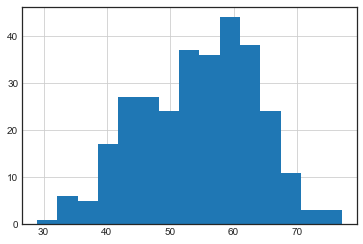

In [63]:
df.age.hist(bins=15)

# Строим логистическую регрессию

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Разбиваем наш датасет на 2: обучающий и тестовый

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=42)
logistic_regression = LogisticRegression()
model=logistic_regression.fit(x_train, y_train)

C:\Users\ArtMed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Спрогнозиуем данные и посмотрим точность

In [41]:
predictions=model.predict(x_test)

print('Accuracy {:.2f}'.format(metrics.accuracy_score(y_test, predictions)))

Accuracy 0.84


Вывод тестового датасета с реальным результатом и прогнозом

In [43]:
df_test=pd.DataFrame(data=x_test, columns=df.columns)
df_test['output']=y_test
df_test['predictions']=predictions
df_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1,1


Строки где реальный результат не сошелся с пронозируемым

In [48]:
df_test[df_test['predictions']!=df_test['output']]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1,0
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,0
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0,1


In [49]:
print('false predictions: {}'.format(df_test[df_test['predictions']!=df_test['output']].shape[0]))
print('Amount of data: {}'.format(df_test.shape[0]))

false predictions: 24
Amount of data: 152
